로이터 뉴스 기사 텍스트 데이터 전처리

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
import numpy as np

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LSTM 활용 로이터 뉴스 카테고리 분류

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 16s 29ms/step - loss: 2.2671 - accuracy: 0.4247 - val_loss: 1.9080 - val_accuracy: 0.5267
Epoch 2/200
450/450 [==============================] - 13s 30ms/step - loss: 1.8231 - accuracy: 0.5317 - val_loss: 1.7277 - val_accuracy: 0.5570
Epoch 3/200
450/450 [==============================] - 15s 33ms/step - loss: 1.6402 - accuracy: 0.5794 - val_loss: 1.6252 - val_accuracy: 0.5882
Epoch 4/200
450/450 [==============================] - 14s 32ms/step - loss: 1.5125 - accuracy: 0.6159 - val_loss: 1.5228 - val_accuracy: 0.6273
Epoch 5/200
450/450 [==============================] - 13s 29ms/step - loss: 1.3765 - accuracy: 0.6460 - val_loss: 1.4912 - val_accuracy: 0.6207
Epoch 6/200
450/450 [==============================] - 14s 31ms/step - loss: 1.2460 - accuracy: 0.6841 - val_loss: 1.3056 - val_accuracy: 0.6643
Epoch 7/200
450/450 [==============================] - 15s 34ms/step - loss: 1.1378 - accuracy: 0.7110 - val_loss: 1.2294 - val_ac

In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 12ms/step - loss: 1.2117 - accuracy: 0.7329

 Test Accuracy: 0.7329


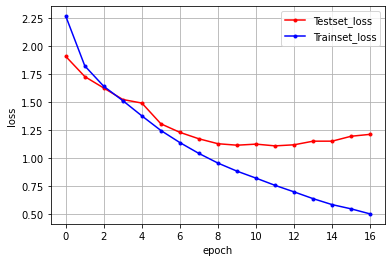

In [13]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

LSTM과 CNN의 조합을 이용한 영화리뷰 분류

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 0s 0us/step


In [17]:
X_train = sequence.pad_sequences(X_train, maxlen=5000)
X_test= sequence.pad_sequences(X_test, maxlen=5000)

In [18]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 112s 217ms/step - loss: 0.4058 - accuracy: 0.7978 - val_loss: 0.2766 - val_accuracy: 0.8910
Epoch 2/100
469/469 [==============================] - 100s 212ms/step - loss: 0.2310 - accuracy: 0.9106 - val_loss: 0.2715 - val_accuracy: 0.8922
Epoch 3/100
469/469 [==============================] - 100s 214ms/step - loss: 0.1803 - accuracy: 0.9325 - val_loss: 0.2816 - val_accuracy: 0.8821
Epoch 4/100
469/469 [==============================] - 101s 215ms/step - loss: 0.1483 - accuracy: 0.9468 - val_loss: 0.2754 - val_accuracy: 0.8893
Epoch 5/100
469/469 [==============================] - 102s 218ms/step - loss: 0.1146 - accuracy: 0.9612 - val_loss: 0.2977 - val_accuracy: 0.8850


In [22]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 57s 72ms/step - loss: 0.3190 - accuracy: 0.8776

 Test Accuracy: 0.8776


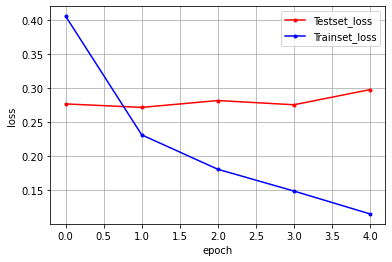

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

어텐션을 사용한 신경망

In [24]:
!pip install attention

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [28]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [33]:
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [36]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 101s 157ms/step - loss: 0.3718 - accuracy: 0.8302 - val_loss: 0.2663 - val_accuracy: 0.8888
Epoch 2/100
625/625 [==============================] - 93s 149ms/step - loss: 0.2191 - accuracy: 0.9118 - val_loss: 0.2798 - val_accuracy: 0.8825
Epoch 3/100
625/625 [==============================] - 88s 140ms/step - loss: 0.1620 - accuracy: 0.9353 - val_loss: 0.3081 - val_accuracy: 0.8849
Epoch 4/100
625/625 [==============================] - 79s 127ms/step - loss: 0.1122 - accuracy: 0.9577 - val_loss: 0.3299 - val_accuracy: 0.8708


In [37]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 25s 31ms/step - loss: 0.3299 - accuracy: 0.8708

 Test Accuracy: 0.8708


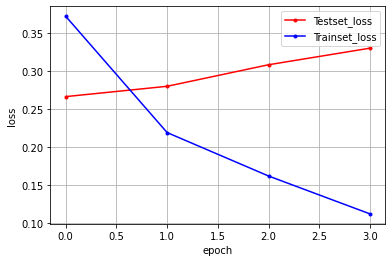

In [38]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()